In [ ]:
"""
Here, we will test the resonance simulations to be run in batch.

"""

'\nHere, we will test the resonance simulations to be run in batch.\n\n'

In [ ]:
import sys
sys.path.append("..//") # parent directory
from AQUA_general import AQUA
from batchAQUA_general import batchAQUA
from stimulus import *
from plotting_functions import *
from phase_response import *


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from functions import *


ModuleNotFoundError: No module named 'AQUA_general'

In [ ]:
RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
    'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.0, 'f': 0.0, 'tau': 0.0}
    # a = 0.03, b = -2

IB = {'name': 'IB', 'C': 150, 'k': 1.2, 'v_r': -75, 'v_t': -45, 'v_peak': 50,
     'a': 0.01, 'b': 5, 'c': -56, 'd': 130, 'e': 0.0, 'f': 0.0, 'tau': 0.0}

FS = {'name': 'FS', 'C': 20, 'k': 1, 'v_r': -55, 'v_t': -40, 'v_peak': 25,
     'a': 0.2, 'b': -2, 'c': -45, 'd': 0, 'e': 0.0, 'f': 0.0, 'tau': 0.0}

In [ ]:
# define some sim params and initialise neuron
T = 5 # s
dt = 0.01   # ms
N_iter = int(1000*T/dt)


neuron = AQUA(IB)

N_neurons = 300
f_range = np.linspace(1, 700, N_neurons, dtype=np.float32)

params_list = []

for n in range(N_neurons):
    params_list.append(IB)


batch = batchAQUA(params_list)


stim_duration = 4.5       # s
y_0, x_ini = find_threshold(IB, np.linspace(0, 400, N_neurons), T, dt)                  # pA, just below threshold
print(y_0)
t_ini = 0.0
x_start = np.full((N_neurons, 3), x_ini)
t_start = np.full(N_neurons, t_ini)

# initialise both neurons
neuron.Initialise(x_ini, t_ini)
batch.Initialise(x_start, t_start)


100%|██████████| 499999/499999 [02:05<00:00, 3978.22it/s]


[262.38632677]


100%|██████████| 499999/499999 [00:05<00:00, 83504.28it/s]


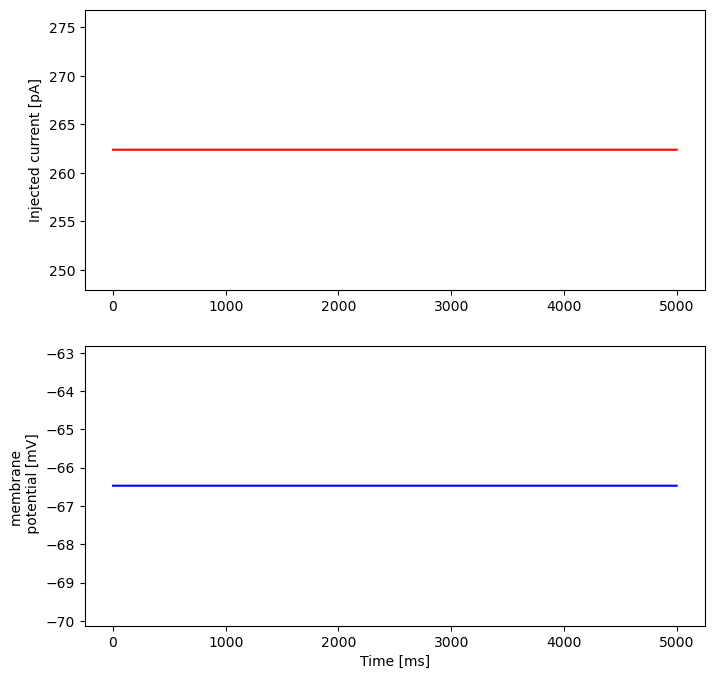

In [ ]:
I_test = y_0 * np.ones(N_iter) 
X, T, spikes = neuron.update_RK2(dt, N_iter, I_test)

fig1, ax1 = plot_potential_versus_injected(X, T, I_test)
plt.show()

In [ ]:
spike_height = 419       # pA
spike_duration = 5.0      # ms
I_inj = np.array([spikes_constant(N_iter, dt, y_0, 1000/f, int(stim_duration*f), spike_height, spike_duration) for f in f_range])

print(np.shape(I_inj))

(300, 500000)


100%|██████████| 499999/499999 [00:06<00:00, 76853.11it/s]


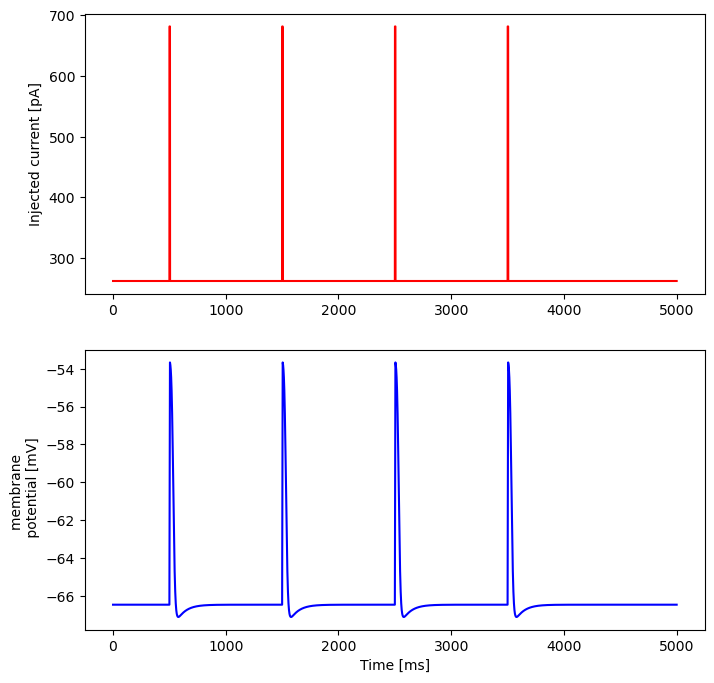

[-66.47149019  42.6425491    0.        ]
[]


In [ ]:
sub_I = I_inj[0, :]
X_test, T_test, spikes_test = neuron.update_RK2(dt, N_iter, sub_I)
#split = range(49000, 60000)
split = range(0, 100000)
fig, ax = plot_potential_versus_injected(X_test, T_test, sub_I) #, split)
ax[1].set_xlabel("Time [ms]")
plt.show()
print(X_test[:, -1])

print(spikes_test)



In [ ]:
print(np.argwhere(sub_I != y_0)[:501])

[[ 50000]
 [ 50001]
 [ 50002]
 [ 50003]
 [ 50004]
 [ 50005]
 [ 50006]
 [ 50007]
 [ 50008]
 [ 50009]
 [ 50010]
 [ 50011]
 [ 50012]
 [ 50013]
 [ 50014]
 [ 50015]
 [ 50016]
 [ 50017]
 [ 50018]
 [ 50019]
 [ 50020]
 [ 50021]
 [ 50022]
 [ 50023]
 [ 50024]
 [ 50025]
 [ 50026]
 [ 50027]
 [ 50028]
 [ 50029]
 [ 50030]
 [ 50031]
 [ 50032]
 [ 50033]
 [ 50034]
 [ 50035]
 [ 50036]
 [ 50037]
 [ 50038]
 [ 50039]
 [ 50040]
 [ 50041]
 [ 50042]
 [ 50043]
 [ 50044]
 [ 50045]
 [ 50046]
 [ 50047]
 [ 50048]
 [ 50049]
 [ 50050]
 [ 50051]
 [ 50052]
 [ 50053]
 [ 50054]
 [ 50055]
 [ 50056]
 [ 50057]
 [ 50058]
 [ 50059]
 [ 50060]
 [ 50061]
 [ 50062]
 [ 50063]
 [ 50064]
 [ 50065]
 [ 50066]
 [ 50067]
 [ 50068]
 [ 50069]
 [ 50070]
 [ 50071]
 [ 50072]
 [ 50073]
 [ 50074]
 [ 50075]
 [ 50076]
 [ 50077]
 [ 50078]
 [ 50079]
 [ 50080]
 [ 50081]
 [ 50082]
 [ 50083]
 [ 50084]
 [ 50085]
 [ 50086]
 [ 50087]
 [ 50088]
 [ 50089]
 [ 50090]
 [ 50091]
 [ 50092]
 [ 50093]
 [ 50094]
 [ 50095]
 [ 50096]
 [ 50097]
 [ 50098]
 [ 50099]


In [ ]:
# simulate response to spiking input
X, T, spikes = batch.update_batch(dt, N_iter, I_inj)



100%|██████████| 499999/499999 [02:02<00:00, 4093.45it/s]


117.88963


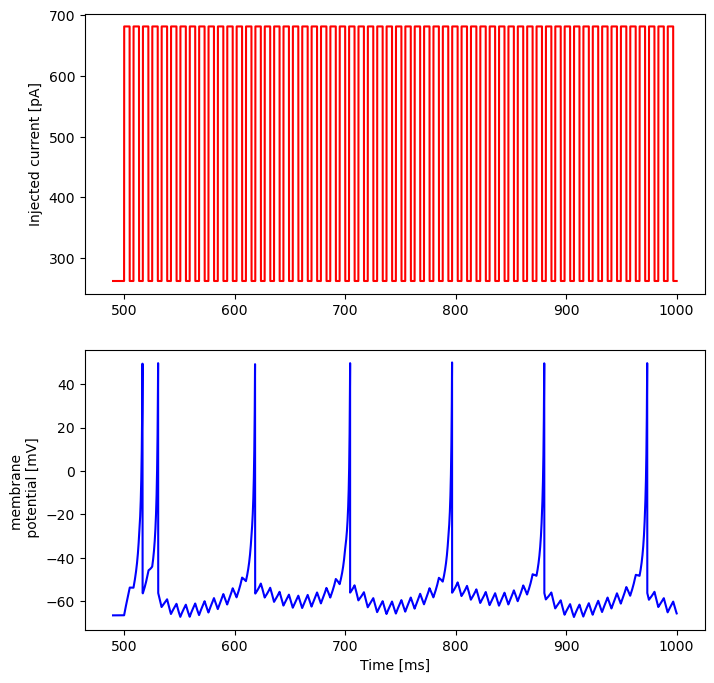

In [ ]:
idx = 50
split = range(49000, 100000)
print(f_range[idx])
fig, ax = plot_potential_versus_injected(X[idx], T, I_inj[idx], split)

plt.show()

  0%|          | 0/499999 [00:00<?, ?it/s]

100%|██████████| 499999/499999 [00:06<00:00, 81125.62it/s]


MemoryError: Unable to allocate 186. GiB for an array with shape (50000, 500000) and data type float64

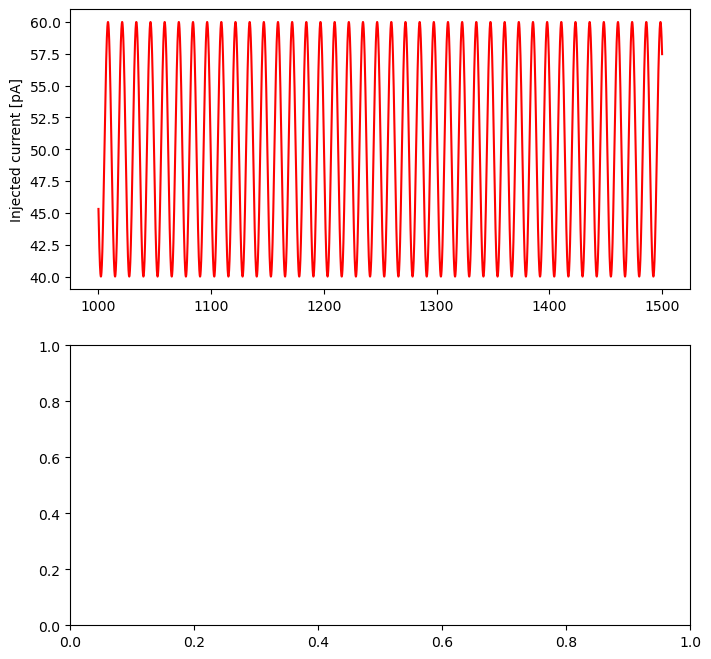

In [ ]:
# injected current 2, ramping frequency
# Can be smart and let a couple cycles pass before increasing the frequency...

freq = 50 # Hz
amp = 10
phase = 0
y_0 = 50 
I_subthresh, x = sinusoid(N_iter, dt, freq, amp, phase, y_0)

neuron.Initialise(x_ini, t_ini)


X_sub, T_sub, spikes_sub = neuron.update_RK2(dt, N_iter, I_subthresh)

split = range(100000, 150000)
fig, ax = plot_potential_versus_injected(X, T, I_subthresh, split)
plt.show()

In [ ]:
I_list = np.linspace(50, 300, 200)


thresh = find_threshold(IB, I_list)

[{'name': 'IB', 'C': 150, 'k': 1.2, 'v_r': -75, 'v_t': -45, 'v_peak': 50, 'a': 0.01, 'b': 5, 'c': -56, 'd': 130, 'e': 0.0, 'f': 0.0, 'tau': 0.0}, {'name': 'IB', 'C': 150, 'k': 1.2, 'v_r': -75, 'v_t': -45, 'v_peak': 50, 'a': 0.01, 'b': 5, 'c': -56, 'd': 130, 'e': 0.0, 'f': 0.0, 'tau': 0.0}, {'name': 'IB', 'C': 150, 'k': 1.2, 'v_r': -75, 'v_t': -45, 'v_peak': 50, 'a': 0.01, 'b': 5, 'c': -56, 'd': 130, 'e': 0.0, 'f': 0.0, 'tau': 0.0}, {'name': 'IB', 'C': 150, 'k': 1.2, 'v_r': -75, 'v_t': -45, 'v_peak': 50, 'a': 0.01, 'b': 5, 'c': -56, 'd': 130, 'e': 0.0, 'f': 0.0, 'tau': 0.0}, {'name': 'IB', 'C': 150, 'k': 1.2, 'v_r': -75, 'v_t': -45, 'v_peak': 50, 'a': 0.01, 'b': 5, 'c': -56, 'd': 130, 'e': 0.0, 'f': 0.0, 'tau': 0.0}, {'name': 'IB', 'C': 150, 'k': 1.2, 'v_r': -75, 'v_t': -45, 'v_peak': 50, 'a': 0.01, 'b': 5, 'c': -56, 'd': 130, 'e': 0.0, 'f': 0.0, 'tau': 0.0}, {'name': 'IB', 'C': 150, 'k': 1.2, 'v_r': -75, 'v_t': -45, 'v_peak': 50, 'a': 0.01, 'b': 5, 'c': -56, 'd': 130, 'e': 0.0, 'f': 0.

100%|██████████| 99999/99999 [00:20<00:00, 4890.63it/s]


[1. 2. 3. 4.]
-------
2
100000.0
200000
200000
9.129452507276277
-------
5
50000.0
250000
450000
-2.6237485370392877
-------
8
33333.33333333333
266666
716666
-9.938665565969808
-------
10
25000.0
250000


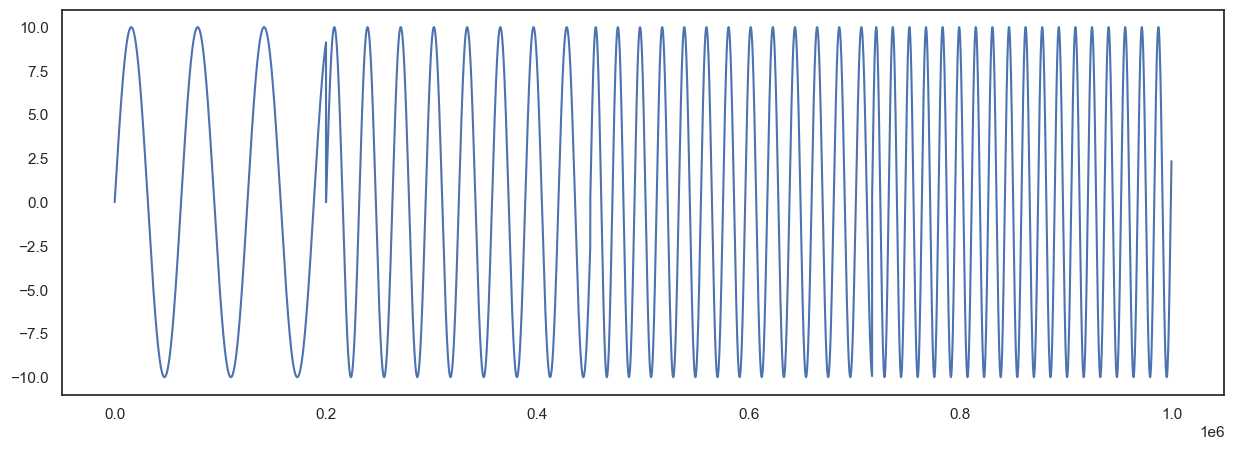

In [ ]:
T = 10
dt = 0.01
N_iter = int(1000*T/dt)

f_range = np.linspace(1, 4, 4)
print(f_range)
amp = 10
I = frequency_ramp(N_iter, dt, 0, f_range, amp)

fig, ax = plt.subplots(figsize = (15, 5))
plt.plot(I)


In [ ]:
import numpy as np

N_sims = 2
N_neurons = 1
N_freq = 2
pulse_starts = np.array([[30, 40, 50], [35, 45, 55]])

spikes = np.array([[32, np.nan], [36, 46]])


""" Actual function definition """
first_spike = spikes[:, 0]
first_spike = np.nan_to_num(first_spike, nan = 0.0)
first_spike = first_spike[:, np.newaxis]


second_spike = spikes[:, 1]
second_spike = np.nan_to_num(second_spike, nan = 0.0)
second_spike = second_spike[:, np.newaxis]

subsequent_spikes = np.zeros((N_neurons, N_freq), dtype = bool)
print(subsequent_spikes)
for n in range(N_sims): # each loop is over a specific frequency
    #Get the time of the first pulse.
    first_pulse = pulse_starts[n, pulse_starts[n, :] < first_spike[n]]
    if len(first_pulse) == 0:
        first_pulse = np.nan
    else:
        first_pulse = first_pulse[-1]
    
    #print(f"first pulse: {first_pulse}")

    # Get the time of the second pulse
    second_pulse = pulse_starts[n, pulse_starts[n, :] < second_spike[n]]
    if len(second_pulse) == 0:      # if no second pulse, then no subsequent spikes
        #print("Nope")
        continue
    else:       # at least 2 spikes
        second_pulse = second_pulse[-1] # start time of the second pulse
        #print(second_pulse)
        #print(" = = = = = = ")
        #print(np.argwhere(pulse_starts[n, :] == first_pulse)+1)
        #print(np.argwhere(pulse_starts[n, :] == second_pulse))
        if np.argwhere(pulse_starts[n, :] == first_pulse)[0]+1 == np.argwhere(pulse_starts[n, :] == second_pulse)[0]:
            #print("The pulses follow each other!")
            subsequent_spikes[n//N_freq, n%N_freq] = True




[[False False]]
0
1
- - - - - -
[[False  True]]


In [ ]:
import numpy as np


lst = [{'a': 1, 'b': 2}, {'c': 3, 'd': 4}, {'e': 5, 'f': 6}]
lst2 = []
dict = [{'g': 7, 'h': 8}]

for _ in range(3):
    lst += dict
    lst2 += dict

print(lst)
print(lst2)


[{'a': 1, 'b': 2}, {'c': 3, 'd': 4}, {'e': 5, 'f': 6}, {'g': 7, 'h': 8}, {'g': 7, 'h': 8}, {'g': 7, 'h': 8}]
[{'g': 7, 'h': 8}, {'g': 7, 'h': 8}, {'g': 7, 'h': 8}]
